<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Clasification

## Libraries importation 

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

## Download data

In [2]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)
                                                          #using only the 10000 most common words

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
train_data.shape
## view of data shape

(25000,)

In [4]:
train_data[0]
## view the data converted in numbers by keras

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]
## Train label example in this case is "1" that´s mean a positive review

1

In [6]:
word_index = imdb.get_word_index()
## As we saw upside, the words are interpreted as numbers, we need a word index
## to know what that mean

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

The structure of word index is not the best, that´s why we need to convert the index to a dictionary

In [8]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [9]:
word_index
#Done

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [10]:
for i in train_data[0]:
    print(word_index.get(i))
     #The first 3 values are key words, we neet to omit them

the
as
you
with
out
themselves
powerful
lets
loves
their
becomes
reaching
had
journalist
of
lot
from
anyone
to
have
after
out
atmosphere
never
more
room
and
it
so
heart
shows
to
years
of
every
never
going
and
help
moments
or
of
every
chest
visual
movie
except
her
was
several
of
enough
more
with
is
now
current
film
as
you
of
mine
potentially
unfortunately
of
you
than
him
that
with
out
themselves
her
get
for
was
camp
of
you
movie
sometimes
movie
that
with
scary
but
and
to
story
wonderful
that
in
seeing
in
character
to
of
70s
musicians
with
heart
had
shadows
they
of
here
that
with
her
serious
to
have
does
when
from
why
what
have
critics
they
is
you
that
isn't
one
will
very
to
as
itself
with
other
and
in
of
seen
over
landed
for
anyone
of
and
br
show's
to
whether
from
than
out
themselves
history
he
name
half
some
br
of
and
odd
was
two
most
of
mean
for
1
any
an
boat
she
he
should
is
thought
frog
but
of
script
you
not
while
history
he
heart
to
real
at
barrel
but
when
from
one
bit
then
have
tw

In [11]:
for i in train_data[0]:
    print(word_index.get(i -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [12]:
def vectorization(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for j, sequences in enumerate(sequences):
        results[j, sequences]=1
    return results


In [13]:
x_train = vectorization(train_data)
x_test = vectorization(train_data)

In [14]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


## Training 

In [15]:
model = models.Sequential()
model.add(layers.Dense(16 , activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16 , activation = "relu"))
model.add(layers.Dense(1 , activation = "sigmoid"))

In [16]:
model.compile(optimizer = "rmsprop",
              loss="binary_crossentropy",
              metrics = "accuracy")


In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20, ## At the start there was 4 epochs, to reduce overfittin
                    # we gonna use 20
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 57ms/step - loss: 0.5597 - accuracy: 0.7644 - val_loss: 0.4292 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3519 - accuracy: 0.8871 - val_loss: 0.3355 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2558 - accuracy: 0.9177 - val_loss: 0.2903 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2082 - accuracy: 0.9303 - val_loss: 0.2778 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1757 - accuracy: 0.9434 - val_loss: 0.2807 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1486 - accuracy: 0.9553 - val_loss: 0.2810 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1294 - accuracy: 0.9595 - val_loss: 0.2894 - val_accuracy: 0.8850
Epoch 8/20
30

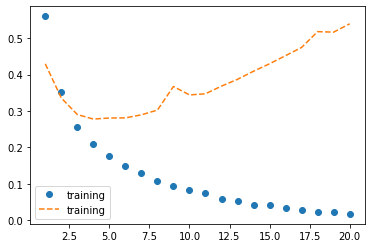

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history #History of performance
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epoch = range(1, len(loss_values) + 1) #range in x aixis
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "training")
plt.legend()
plt.show()

There exist overfitting, we need to improve the model

In [20]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 4.3530 - accuracy: 0.4968


[4.352971076965332, 0.4968000054359436]

In [21]:
history_dict

{'loss': [0.5597459673881531,
  0.351891428232193,
  0.2557864785194397,
  0.20823156833648682,
  0.17565371096134186,
  0.14858165383338928,
  0.12943337857723236,
  0.10744832456111908,
  0.09497585892677307,
  0.08333528786897659,
  0.07436075061559677,
  0.059651196002960205,
  0.05376306176185608,
  0.042848967015743256,
  0.04159072786569595,
  0.03257065266370773,
  0.02965364046394825,
  0.023294489830732346,
  0.022660937160253525,
  0.017712967470288277],
 'accuracy': [0.7644000053405762,
  0.887066662311554,
  0.9176666736602783,
  0.9302666783332825,
  0.9434000253677368,
  0.9552666544914246,
  0.9594666957855225,
  0.9690666794776917,
  0.972599983215332,
  0.9769999980926514,
  0.9801333546638489,
  0.9860666394233704,
  0.9872666597366333,
  0.9921333193778992,
  0.9917333126068115,
  0.9944000244140625,
  0.9949333071708679,
  0.9968000054359436,
  0.9961333274841309,
  0.9971333146095276],
 'val_loss': [0.42919448018074036,
  0.3355395793914795,
  0.29027536511421204,

Now is neccesary to try wih different methods to reduce the overfitting 

## Training a less complex model

In [22]:
model2 = models.Sequential()
model2.add(layers.Dense(4 , activation = "relu", input_shape = (10000,)))
model2.add(layers.Dense(4 , activation = "relu"))
model2.add(layers.Dense(1 , activation = "sigmoid"))

## Using the same properties
model2.compile(optimizer = "rmsprop",
              loss="binary_crossentropy",
              metrics = "accuracy")

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))
## We are using a smaller model with only 4 neurons

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6275 - accuracy: 0.7141 - val_loss: 0.5435 - val_accuracy: 0.8107
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4778 - accuracy: 0.8672 - val_loss: 0.4437 - val_accuracy: 0.8532
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3841 - accuracy: 0.8925 - val_loss: 0.3763 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3180 - accuracy: 0.9077 - val_loss: 0.3340 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2703 - accuracy: 0.9185 - val_loss: 0.3078 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2346 - accuracy: 0.9265 - val_loss: 0.2899 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2059 - accuracy: 0.9342 - val_loss: 0.2799 - val_accuracy: 0.8920
Epoch 8/20
30

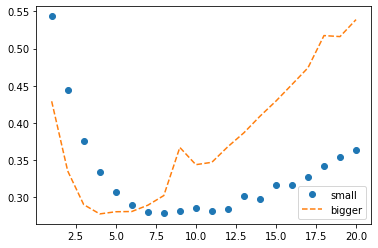

In [23]:
history_dict = history.history 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_loss_values_2 = history2.history["val_loss"] ## here we are using the second model

epoch = range(1, len(loss_values) + 1) 
plt.plot(epoch, val_loss_values_2, "o", label = "small")
plt.plot(epoch, val_loss_values, "--", label = "bigger")
plt.legend()
plt.show()

## Regularization

In [24]:
from keras import regularizers

In [25]:
#Using the same structure but with regularization

model3 = models.Sequential()
model3.add(layers.Dense(4 , activation = "relu", input_shape = (10000,),
                         kernel_regularizer = regularizers.l2(0.001) )) ## regularizer with l2 and delta/lambda 0.001
model3.add(layers.Dense(4 , activation = "relu", kernel_regularizer = regularizers.l2(0.001))) #in both 
model3.add(layers.Dense(1 , activation = "sigmoid"))

model3.compile(optimizer = "rmsprop",
              loss="binary_crossentropy",
              metrics = "accuracy")

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5905 - accuracy: 0.7599 - val_loss: 0.5058 - val_accuracy: 0.8455
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4423 - accuracy: 0.8821 - val_loss: 0.4265 - val_accuracy: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3635 - accuracy: 0.9052 - val_loss: 0.3735 - val_accuracy: 0.8792
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3129 - accuracy: 0.9171 - val_loss: 0.3442 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2792 - accuracy: 0.9273 - val_loss: 0.3346 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2531 - accuracy: 0.9346 - val_loss: 0.3189 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2359 - accuracy: 0.9385 - val_loss: 0.3151 - val_accuracy: 0.8896
Epoch 8/20
30

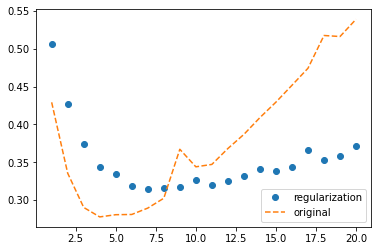

In [26]:
history_dict = history.history 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_loss_values_3 = history3.history["val_loss"] ## here we are using the third model

epoch = range(1, len(loss_values) + 1) 
plt.plot(epoch, val_loss_values_3, "o", label = "regularization")
plt.plot(epoch, val_loss_values, "--", label = "original")
plt.legend()
plt.show()

## Dropout

In [27]:
model4 = models.Sequential()
model4.add(layers.Dense(4 , activation = "relu", input_shape = (10000,)))
model4.add(layers.Dropout(0.5)) #We are inactivating the 50% of our layers 
model4.add(layers.Dense(4 , activation = "relu"))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1 , activation = "sigmoid"))

model4.compile(optimizer = "rmsprop",
              loss="binary_crossentropy",
              metrics = "accuracy")

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))
## We are using a smaller model with only 4 neurons

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6808 - accuracy: 0.5705 - val_loss: 0.6456 - val_accuracy: 0.6951
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6458 - accuracy: 0.6428 - val_loss: 0.6017 - val_accuracy: 0.8024
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6185 - accuracy: 0.6753 - val_loss: 0.5698 - val_accuracy: 0.8538
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5903 - accuracy: 0.7013 - val_loss: 0.5281 - val_accuracy: 0.8638
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5678 - accuracy: 0.7119 - val_loss: 0.5010 - val_accuracy: 0.8755
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5495 - accuracy: 0.7281 - val_loss: 0.4685 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5246 - accuracy: 0.7405 - val_loss: 0.4402 - val_accuracy: 0.8837
Epoch 8/20
30

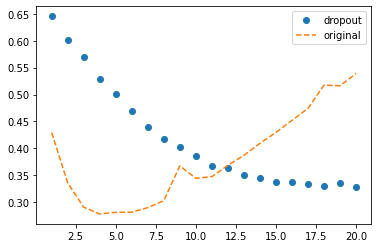

In [28]:
history_dict = history.history 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_loss_values_4 = history4.history["val_loss"] ## here we are using the third model

epoch = range(1, len(loss_values) + 1) 
plt.plot(epoch, val_loss_values_4, "o", label = "dropout")
plt.plot(epoch, val_loss_values, "--", label = "original")
plt.legend()
plt.show()

## Trying with my own model

In [33]:
# In this case using  dropout could be a good option

model5 = models.Sequential()
model5.add(layers.Dense(4 , activation = "relu", input_shape = (10000,)))
model5.add(layers.Dropout(0.5)) 
model5.add(layers.Dense(4 , activation = "relu"))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(1 , activation = "sigmoid"))

model5.compile(optimizer = "rmsprop",
              loss="binary_crossentropy",
              metrics = "accuracy")

history5 = model5.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6686 - accuracy: 0.5921 - val_loss: 0.6350 - val_accuracy: 0.7354
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6249 - accuracy: 0.6807 - val_loss: 0.5886 - val_accuracy: 0.8215
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5981 - accuracy: 0.7155 - val_loss: 0.5724 - val_accuracy: 0.8695
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5806 - accuracy: 0.7361 - val_loss: 0.5296 - val_accuracy: 0.8597
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5649 - accuracy: 0.7523 - val_loss: 0.5141 - val_accuracy: 0.8419
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5533 - accuracy: 0.7567 - val_loss: 0.4960 - val_accuracy: 0.8699
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5420 - accuracy: 0.7665 - val_loss: 0.4788 - val_accuracy: 0.8721
Epoch 8/20
30

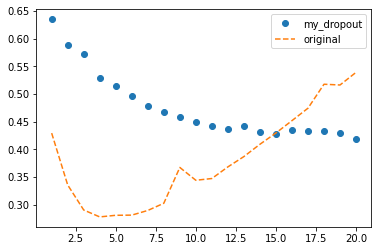

In [34]:
history_dict = history.history 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_loss_values_5 = history5.history["val_loss"] ## here we are using the third model

epoch = range(1, len(loss_values) + 1) 
plt.plot(epoch, val_loss_values_5, "o", label = "my_dropout")
plt.plot(epoch, val_loss_values, "--", label = "original")
plt.legend()
plt.show()